<a href="https://colab.research.google.com/github/Aryan0199/Start-up-Success-Prediction-Using-Predictive-Analysis/blob/main/Startup_success.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [171]:
#all the librarys used in this project
import pandas as pd
import numpy as np

import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import preprocessing

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
 
from IPython.display import Image 
!pip install pydotplus
import pydotplus
import graphviz
from six import StringIO

import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO 

from pydot import graph_from_dot_data
from sklearn.utils import resample



from sklearn.tree import export_graphviz
import pydot
import random
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Importing the Dataset**

In [137]:
df = pd.read_csv("https://raw.githubusercontent.com/Aryan0199/Startup_success_Prediction/main/investments_VC.csv")


In [138]:
df.head(3)
df2=df

In [139]:
df.head().T

,0,1,2,3,4
permalink,/organization/waywire,/organization/tv-communications,/organization/rock-your-paper,/organization/in-touch-network,/organization/r-ranch-and-mine
name,#waywire,&TV Communications,'Rock' Your Paper,(In)Touch Network,-R- Ranch and Mine
homepage_url,http://www.waywire.com,http://enjoyandtv.com,http://www.rockyourpaper.org,http://www.InTouchNetwork.com,NaN
category_list,|Entertainment|Politics|Social Media|News|,|Games|,|Publishing|Education|,|Electronics|Guides|Coffee|Restaurants|Music|i...,|Tourism|Entertainment|Games|
market,News,Games,Publishing,Electronics,Tourism
funding_total_usd,"17,50,000","40,00,000","40,000","15,00,000","60,000"
status,acquired,operating,operating,operating,operating
country_code,USA,USA,EST,GBR,USA
state_code,NY,CA,NaN,NaN,TX
region,New York City,Los Angeles,Tallinn,London,Dallas


# **Metadata of dataset**

In [140]:
df.shape   #size of data set

(49438, 39)

In [141]:
df.columns #column-names

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [142]:
desc = ['Static hyperlink for the startup on Crunchbase\'s website','name of the startup','Website address of the startup',
       'in which category the startups fall','which market the startup caters to','total funding received(in USD)',
        'current operating status','country of origin','state of origin','region','city of origin','total rounds of funding',
        'date of founding','month of founding','quarter of founding','year of founding','date of first funding','date of last funding',
        'seed funding received(in USD)','venture funding received(in USD)','funding received by diluting equity',
        'other undisclosed funding sources','funding received from convertible notes','funding received from debts',
        'funding received from angel investors','funding from grants','funding from private equity',
        'funding from equity dilution after IPO','funding from debts after IPO','funding from secondary markets',
        'funding from crowdfunding','round A funding','round B funding','round C funding','round D funding','round E funding',
       'round F funding','round G funding','round H funding']
df_details = pd.DataFrame(list(zip(df.columns, desc)), columns =['Column', 'Description'])
df_details

,Column,Description
0,permalink,Static hyperlink for the startup on Crunchbase...
1,name,name of the startup
2,homepage_url,Website address of the startup
3,category_list,in which category the startups fall
4,market,which market the startup caters to
5,funding_total_usd,total funding received(in USD)
6,status,current operating status
7,country_code,country of origin
8,state_code,state of origin
9,region,region


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49438 entries, 0 to 49437
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  int64  
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

Our dataset comprises of numerical as wella s categorical variables.<br>
So it is essential to verify whether variables are correctly inferred.<br>
The most important variable is our target variable i.e 'status'.<br>
Form the info-table, we found that certain numerical columns like ***funding_total_usd*** is being read as **object rather than numerical**.


# **Data Cleaning**

In [144]:
# some of the columns have space in front. Removing spaces from the front.
df = df.rename(columns={' market ': "market", ' funding_total_usd ': "funding_total_usd"})

# the funding total column is read as a object so clearning it up so that we can use it as a numerical column
df['funding_total_usd']=df['funding_total_usd'].str.replace(',','') # removing commas from funding_total_usd column
df['funding_total_usd']=df['funding_total_usd'].str.replace(' ','')#removing extra space from funding_total_usd column
df['funding_total_usd']=df['funding_total_usd'].str.replace('-','0') #removing - from funding_total_usd column and replacing with 0


df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'])# turning column to number



df.market = df.market.str.strip() #removing space from beginnning and end of market column



> **Turning all date columns in to date**



In [145]:

df['founded_at'] =  pd.to_datetime(df['founded_at'],errors='coerce') # converting column into date and ignoring errors
df['founded_at']=df['founded_at'].dt.strftime('%Y-%m-%d')
df['founded_at']=pd.to_datetime(df['founded_at'])



In [146]:
df['first_funding_at'] =  pd.to_datetime(df['first_funding_at'],errors='coerce') # converting column into date and ignoring errors
df['first_funding_at']=df['first_funding_at'].dt.strftime('%Y-%m-%d')
df['first_funding_at']=pd.to_datetime(df['first_funding_at'])
df['first_funding_at']

0       2012-06-30
1       2010-04-06
2       2012-09-08
3       2011-01-04
4       2014-08-17
           ...    
49433   2014-03-24
49434   2012-01-04
49435   2011-01-11
49436   2011-11-21
49437   2008-01-06
Name: first_funding_at, Length: 49438, dtype: datetime64[ns]

In [147]:
df['last_funding_at'] =  pd.to_datetime(df['last_funding_at'],errors='coerce') # converting column into date and ignoring errors
df['last_funding_at']=df['last_funding_at'].dt.strftime('%Y-%m-%d')
df['last_funding_at']=pd.to_datetime(df['last_funding_at'])
df['last_funding_at']

0       2012-06-30
1       2010-09-23
2       2012-09-08
3       2011-01-04
4       2014-09-26
           ...    
49433   2014-03-24
49434   2012-01-04
49435   2014-10-09
49436   2011-11-21
49437   2013-04-04
Name: last_funding_at, Length: 49438, dtype: datetime64[ns]

In [148]:
df['founded_year'] =  pd.to_datetime(df['founded_year'],errors='coerce') # converting column into date and ignoring errors
df['founded_year']=df['founded_year'].dt.strftime('%Y-%m-%d')
df['founded_year']=pd.to_datetime(df['founded_year'])
df['founded_year']

0       1970-01-01
1              NaT
2       1970-01-01
3       1970-01-01
4       1970-01-01
           ...    
49433   1970-01-01
49434          NaT
49435   1970-01-01
49436          NaT
49437   1970-01-01
Name: founded_year, Length: 49438, dtype: datetime64[ns]

In [149]:
df['founded_month'] =  pd.to_datetime(df['founded_month'],errors='coerce') # converting column into date and ignoring errors
df['founded_month']=df['founded_month'].dt.strftime('%Y-%m-%d')
df['founded_month']=pd.to_datetime(df['founded_month'])
df['founded_month']

0       2012-06-01
1              NaT
2       2012-10-01
3       2011-04-01
4       2014-01-01
           ...    
49433   2013-01-01
49434          NaT
49435   2012-05-01
49436          NaT
49437   1999-01-01
Name: founded_month, Length: 49438, dtype: datetime64[ns]

In [150]:
#Removing the row with no 'name'
df.dropna(how='any', subset=['name'], axis=0, inplace=True)

In [151]:
#Replacing missing status with "unknown"
df['status'] = df['status'].replace(np.nan,"unknown")

In [152]:
#cheking funding before 1902
import datetime
d1=datetime.datetime(1902,1,1)
print(df[df['first_funding_at']<d1][['name', 'founded_at', 'first_funding_at']])
df.drop(df[df['first_funding_at']<d1].index, inplace=True)
df.shape

Empty DataFrame
Columns: [name, founded_at, first_funding_at]
Index: []


(49437, 39)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49437 entries, 0 to 49437
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   permalink             49437 non-null  object        
 1   name                  49437 non-null  object        
 2   homepage_url          45988 non-null  object        
 3   category_list         45476 non-null  object        
 4   market                45469 non-null  object        
 5   funding_total_usd     49437 non-null  int64         
 6   status                49437 non-null  object        
 7   country_code          44165 non-null  object        
 8   state_code            30161 non-null  object        
 9   region                44165 non-null  object        
 10  city                  43322 non-null  object        
 11  funding_rounds        49437 non-null  int64         
 12  founded_at            38552 non-null  datetime64[ns]
 13  founded_month   

# **Exploratory Data Analysis**

> **Statistical Analysis of Numerical Data**




In [154]:
# stats of numerical data
round (df.describe(exclude = ['object','datetime64']), 2)

,funding_total_usd,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,4.943700e+04,49437.00,4.943700e+04,4.943700e+04,49437.00,4.943700e+04,4.943700e+04,4.943700e+04,49437.00,4.943700e+04,...,49437.0,49437.00,4.943700e+04,4.943700e+04,4.943700e+04,4.943700e+04,4.943700e+04,4.943700e+04,4.943700e+04,4.943700e+04
mean,1.316693e+07,1.70,2.173254e+05,7.501202e+06,6163.45,1.302239e+05,2.336457e+04,1.888195e+06,65420.30,1.628486e+05,...,38456.7,7074.37,1.243980e+06,1.492921e+06,1.205380e+06,7.375410e+05,3.424751e+05,1.697726e+05,5.767183e+04,1.423226e+04
std,1.535556e+08,1.29,1.056995e+06,2.847139e+07,199906.84,2.981434e+06,1.432060e+06,1.382060e+08,658297.38,5.612145e+06,...,3864499.7,428220.92,5.532027e+06,7.472777e+06,7.993671e+06,9.815317e+06,5.406969e+06,6.277969e+06,5.252365e+06,2.716893e+06
min,0.000000e+00,1.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,...,0.0,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.000000e+04,1.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,...,0.0,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+06,1.00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,...,0.0,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,6.772388e+06,2.00,2.500000e+04,5.000000e+06,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,...,0.0,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.007950e+10,18.00,1.300000e+08,2.351000e+09,25000000.00,2.924328e+08,3.000000e+08,3.007950e+10,63590263.00,7.505000e+08,...,680611554.0,72000000.00,3.190000e+08,5.420000e+08,4.900000e+08,1.200000e+09,4.000000e+08,1.060000e+09,1.000000e+09,6.000000e+08




> **Statistical Analysis of Categorical Data**



In [155]:
# stats of categorical data
df.describe(exclude = ['float', 'int64','datetime64'])

,permalink,name,homepage_url,category_list,market,status,country_code,state_code,region,city,founded_quarter
count,49437,49437,45988,45476,45469,49437,44165,30161,44165,43322,38481
unique,49435,49350,45849,16675,753,4,115,61,1089,4188,218
top,/organization/prysm,Roost,http://www.smartfocus.com,|Software|,Software,operating,USA,CA,SF Bay Area,San Francisco,2012-Q1
freq,2,4,2,3650,4620,41829,28793,9917,6804,2615,2904




> **Visualizing Missing Values**



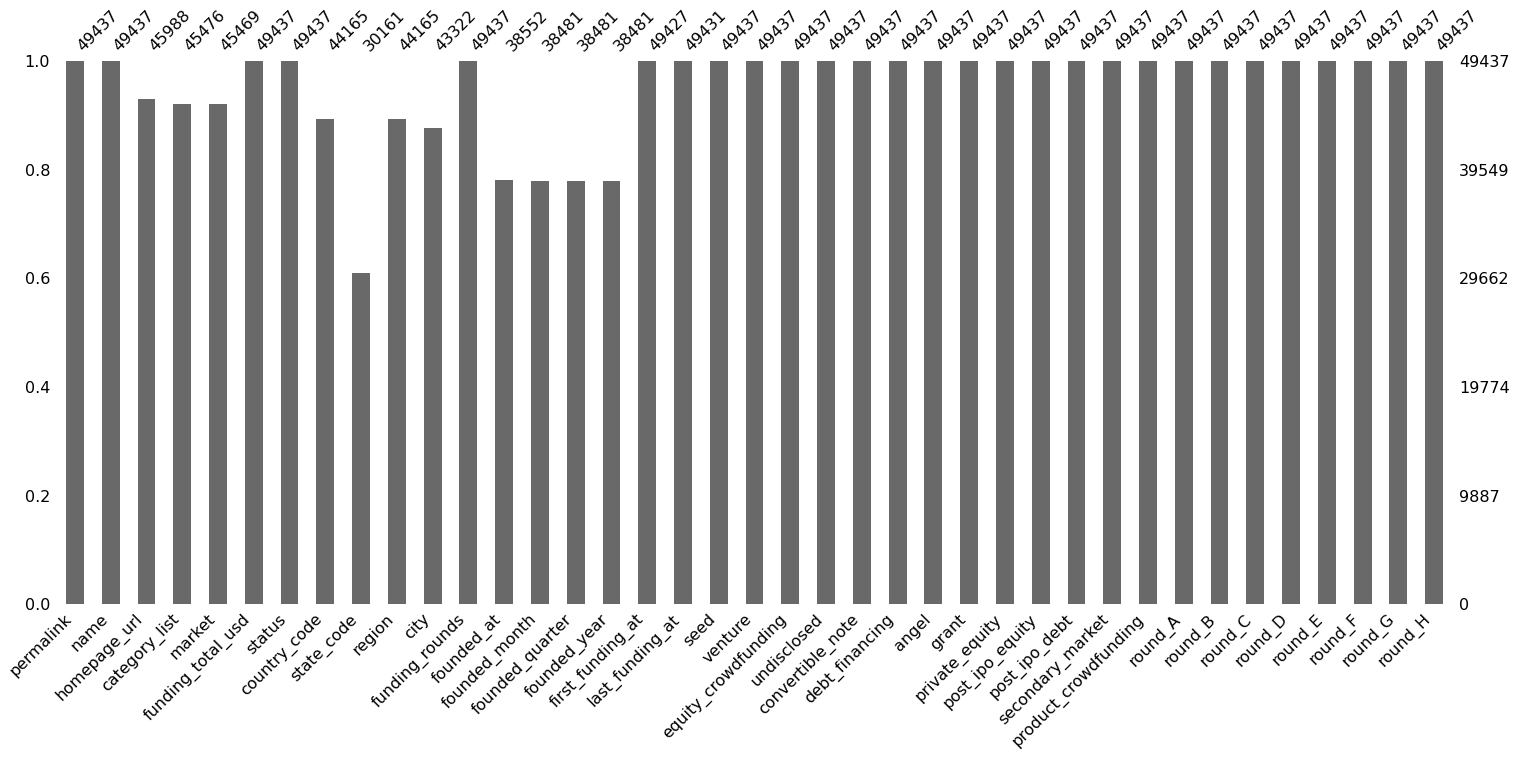

In [156]:
#Import the library
 
import missingno as msnum 
msnum.bar(df)

In [157]:
# import plotly.express as px
# fig=px.pie(df,names='status', color_discrete_sequence=['#46205c', '#b74068']) 
# fig.update_layout(title='<b>Proportion of status of startups<b> ')
# fig.show(renderer="colab") 

In [158]:

#cleaning the dataframe by dropping uneccessary columns
df2 = df2.drop(['permalink', 'homepage_url'], axis=1)
#Removing the row with no 'name'
df2.dropna(how='any', subset=['name'], axis=0, inplace=True)
#Extracting year value from "first_funding_at" and changing to int
df2['first_funding_at'] = df2.first_funding_at.str.split("-").str[0]
df2['first_funding_at'] = df2['first_funding_at'].astype(int)
#Extracting year value from "last_funding_at" and changing to int
df2['last_funding_at'] = df2.last_funding_at.str.split("-").str[0]
df2['last_funding_at'] = df2['last_funding_at'].astype(int)
#Changing the values in column "funding_total_usd" from string to float
df2[' funding_total_usd '] = df2[' funding_total_usd '].str.strip().str.replace(",","")
df2[' funding_total_usd '] = df2[' funding_total_usd '].replace("-",0).astype("float")
#Replacing missing status with "unknown"
df2['status'] = df2['status'].replace(np.nan,"unknown")
print(df2.shape)
df2.head()

(49437, 37)


,name,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,#waywire,|Entertainment|Politics|Social Media|News|,News,1750000.0,acquired,USA,NY,New York City,New York,1,...,0,0,0,0,0,0,0,0,0,0
1,&TV Communications,|Games|,Games,4000000.0,operating,USA,CA,Los Angeles,Los Angeles,2,...,0,0,0,0,0,0,0,0,0,0
2,'Rock' Your Paper,|Publishing|Education|,Publishing,40000.0,operating,EST,NaN,Tallinn,Tallinn,1,...,0,0,0,0,0,0,0,0,0,0
3,(In)Touch Network,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.0,operating,GBR,NaN,London,London,1,...,0,0,0,0,0,0,0,0,0,0
4,-R- Ranch and Mine,|Tourism|Entertainment|Games|,Tourism,60000.0,operating,USA,TX,Dallas,Fort Worth,2,...,0,0,0,0,0,0,0,0,0,0



> **Number of Startups founded and funded each year**




In [162]:
fig_founded_funding = go.Figure()
fig_founded_funding.add_trace(go.Histogram(x=df2['founded_year'], name="Founded year", marker=dict(opacity=0.9),
                                          hovertemplate = '<br><b>Year</b>: %{x}'+'<br><i>Startup count</i>: %{y}'
                                          ))
fig_founded_funding.add_trace(go.Histogram(x=df2['first_funding_at'], name="First Funding Year", marker=dict(opacity=0.5),
                                          hovertemplate = '<br><b>Year</b>: %{x}'+'<br><i>Startup count</i>: %{y}'
                                          ))
fig_founded_funding.update_layout(barmode='overlay',
                                 title="Overall Relation between starting of Startups and starting of Funding.",
                                 xaxis_title='Year', yaxis_title="Count",title_x=0.5, paper_bgcolor="mintcream",
                             title_font_size=20,legend=dict(orientation='h',yanchor='top',y=1.1,xanchor='right',x=1))
fig_founded_funding.update_yaxes(range=[0,5000])
# Add range slider
fig_founded_funding.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=10,
                     label="10y",
                     step="year",
                     stepmode="backward"),
                dict(count=20,
                     label="20y",
                     step="year",
                     stepmode="backward"),
                dict(count=50,
                     label="50y",
                     step="year",
                     stepmode="todate"),
                dict(count=100,
                     label="100y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig_founded_funding.show()

We can see that startups were consistently getting founded after 1990 but that saw an increase in 1999 when the number of startups founded was 758 which increased by more than 70% as compared with 1998 with only 437 startups. Another observation is that, even though startups were getting founded in since the early 90s, they couldn't attract investors to fund their visions until 2004. But, in 2005, finally, investors took notice of the startups and 1418 startups got funding which is a sensational increase of above 420% and changed the startup scene forever. This is possibly the biggest jump in investments pouring into startups since its inception.

Note: The <b style="color:blue">BLUE</b> plot shows the numbe of 
startups founded per year while the <b style="color:red">RED</b> plot shows the number of startups the got their first funding in that year. 

> **Founding year of some of the Unicorns**

In [165]:
#Making the list of some of the most famous unicorns
df2_name_index = df2.set_index('name', drop=True)
startup_unicorns = ["Uber","Amazon","Google","Dropbox","Facebook","Alibaba",
                     "Stripe","Airbnb","Robinhood","Reddit",
                    "DigitalOcean","Coursera"]
color = ['Black','Orange','Blue','Darkblue', 'lightblue', 'darkorange','teal',
         'red','lightgreen','orange','blue','lightblue']
unicorn_founding_year = []
total_funding=[]
seed = []
vc = []
#Extracting its details from the dataset
for i in startup_unicorns:
    unicorn_founding_year.append(int(df2_name_index.loc[i]['founded_year']))
    total_funding.append(int(df2_name_index.loc[i][' funding_total_usd ']))
    seed.append(int(df2_name_index.loc[i]['seed']))
    vc.append(int(df2_name_index.loc[i]['venture']))        
df2_unicorns = pd.DataFrame(list(zip(startup_unicorns, unicorn_founding_year, total_funding, seed, vc, color)),
                           columns=['Unicorn name', 'Founding year','Total funding', 'Seed', 'Venture Capital', 'Color']).sort_values(by='Seed')
df2_unicorns.head()

,Unicorn name,Founding year,Total funding,Seed,Venture Capital,Color
1,Amazon,1994,8000000,0,8000000,Orange
2,Google,1998,25100000,0,25000000,Blue
4,Facebook,2004,2425700000,0,615200000,lightblue
5,Alibaba,1999,1112000000,0,0,darkorange
11,Coursera,2012,85000000,0,85000000,lightblue


In [166]:
fig_unicorn_founded = go.Figure()
fig_unicorn_founded.add_trace(go.Histogram(x=df2[df2['founded_year']>1990]['founded_year'], name="Founded year", marker=dict(opacity=0.9),
                                          hovertemplate = '<br><b>Year</b>: %{x}'+'<br><i>Startup count</i>: %{y}'
                                          ))

for i in df2_unicorns['Unicorn name']:
    fig_unicorn_founded.add_shape(
            # Line Vertical
            dict(
                type="line",
                xref="x",
                yref="paper",
                x0=str(list(df2_unicorns[df2_unicorns['Unicorn name']==i]['Founding year'])[0]),
                y0=0,
                x1=str(list(df2_unicorns[df2_unicorns['Unicorn name']==i]['Founding year'])[0]),
                y1=1,
                line=dict(
                    color=str(list(df2_unicorns[df2_unicorns['Unicorn name']==i]['Color'])[0]),
                    width=1
                )
    ))
    
fig_unicorn_founded.add_trace(go.Scatter(x=df2_unicorns['Founding year'],
                                        y=df2_unicorns.index*700+300, mode="text", text=df2_unicorns[['Unicorn name']], 
                                        textfont=dict(family="sans serif",size=15), showlegend=False,
                                        hovertemplate = '<br><b>Company</b>: %{text}'+'<br><i>Founding Year</i>: %{x}'
                                        ))

fig_unicorn_founded.update_layout(title="Years in which some Startup Unicorns were founded",
                             xaxis_title="Year", yaxis_title="Startup Count",title_x=0.5, paper_bgcolor="mintcream",
                             title_font_size=20,legend=dict(orientation='h',yanchor='top',y=1.1,xanchor='right',x=1))
fig_unicorn_founded.show()

We can see that companies like Amazon and Google were among the first ones to capture the market as they happen to be founded when there was a continuous increase in the number of companies getting founded. After some time came Facebook which in a way changed the culture and opened the door for other startups and others did follow it.



> **Distribution of startups in various countries**

In [167]:
fig_country = go.Figure()
fig_country.add_trace(go.Bar(x=df2['country_code'].value_counts().index[:20], y=df2['country_code'].value_counts()[:20],
                           hovertemplate = '<br><b>Country</b>: %{x}'+'<br><i>Startup count</i>: %{y}',
                           marker=dict(color=list(range(20)), colorscale="Sunsetdark")))

fig_country.update_layout(title="Number of Startups in each Country",
                             xaxis_title="Country", yaxis_title="Startup Count",title_x=0.5, paper_bgcolor="mintcream",
                             title_font_size=20)
fig_country.show()

From the chart above, the USA has an edge over the number of startups founded at 28792 which is more than 10 times the second country Britain with only 2642. But since this data is only till 2014, the present distribution can not be shown. The current situation is different as many other countries have taken charge and are innovating at a speed that has never been encountered.



> **Visualising distribution of startups among countries**

In [168]:
fig_country_map = go.Figure()
fig_country_map.add_trace(go.Choropleth(locations=df2['country_code'].value_counts().index,
                                       z=df2['country_code'].value_counts(),
                                       colorscale='Peach',
                                       colorbar_title="Nos. of Startups founded",
                                       ))
fig_country_map.update_layout(title_text="Number of Startups Country wise.", title_x=0.5, title_font_size=20, paper_bgcolor="mintcream")
fig_country_map.show()

> **Comparing Markets**

In [169]:
fig_market = go.Figure()
fig_market.add_trace(go.Bar(x=df2[' market '].value_counts().index[:30], y=df2[' market '].value_counts()[:30],
                           hovertemplate = '<br><b>Market</b>: %{x}'+'<br><i>Startup count</i>: %{y}',
                           marker=dict(color=list(range(30)), colorscale="Sunsetdark")))

fig_market.update_layout(title="Number of Startups in each Market",
                             xaxis_title="Market", yaxis_title="Startup Count",title_x=0.5, paper_bgcolor="mintcream",
                             title_font_size=20)
fig_market.show()

We can see the top 30 markets, in the above plot, that different startups target to and it's of no surprise that more than 4500 startups fall into the "Software" market. With the advent of cloud computing and advances in ML/AI capabilities, many new startups are trying to use ML/AI techniques to simplify existing and workflows and even create entirely new applications. Software startups also attract a lot of entrepreneurs because of its scalability, the sheer possibility of creating software once and scaling it to be used by millions of people helps make a startup profitable.



> **Markets with Most and Least closed startups**

In [172]:
fig_closed = make_subplots(rows=1, cols=2, shared_yaxes=True,
                           subplot_titles=("Markets with Most closed Startups", "Markets with Least closed Startups"))
fig_closed.add_trace(go.Bar(x=df2[df2['status']=='closed'][' market '].value_counts()[:10].index,
                            y=df2[df2['status']=='closed'][' market '].value_counts()[:10], name="Market with most closed Startups",
                            marker=dict(color=list(range(20)), colorscale="reds_r"),
                           hovertemplate = '<br><b>Market</b>: %{x}'+'<br><i>Startup count</i>: %{y}'
                           ),
                            row=1, col=1)
fig_closed.add_trace(go.Bar(x=df2[df2['status']=='closed'][' market '].value_counts()[-10:].index,
                            y=df2[df2['status']=='closed'][' market '].value_counts()[-10:], name="Market with least closed Startups",
                            marker=dict(color=list(range(20)), colorscale="greens_r"),
                           hovertemplate = '<br><b>Market</b>: %{x}'+'<br><i>Startup count</i>: %{y}'
                           ),
                            row=1, col=2)

fig_closed.update_layout(showlegend=False, paper_bgcolor="mintcream")
fig_closed.show()

Without surprise, Sofware tops the charts not only in most startups founded but also for most startups closed, as everyone wants a piece of this cake but the numbers clearly show us that, that is not so easy. Another noticeable thing is that markets with least closed startups are



> **Markets with most and Least Acquired startups**

In [173]:
fig_acquired = make_subplots(rows=1, cols=2, shared_yaxes=True,
                           subplot_titles=("Markets with Most acquired Startups", "Markets with Least acquired Startups"), )
fig_acquired.add_trace(go.Bar(x=df2[df2['status']=='acquired'][' market '].value_counts()[:10].index,
                            y=df2[df2['status']=='acquired'][' market '].value_counts()[:10],
                            marker=dict(color=list(range(20)), colorscale="greens_r"),
                             hovertemplate = '<br><b>Market</b>: %{x}'+'<br><i>Startup count</i>: %{y}'
                             ),
                            row=1, col=1)
fig_acquired.add_trace(go.Bar(x=df2[df2['status']=='acquired'][' market '].value_counts()[-10:].index,
                            y=df2[df2['status']=='acquired'][' market '].value_counts()[-10:],
                            marker=dict(color=list(range(20)), colorscale="reds_r"),
                             hovertemplate = '<br><b>Market</b>: %{x}'+'<br><i>Startup count</i>: %{y}'
                             ),
                            row=1, col=2)

fig_acquired.update_layout(showlegend=False, paper_bgcolor="mintcream")
fig_acquired.show()

> **Relation between number of funding and Amount of funding in each round**

In [175]:
fig_funding_amt = px.scatter(df2[:5000],x="name", y="funding_rounds", size=' funding_total_usd ', color='status')

fig_funding_amt.update_layout(title='Plot Showing the Funding and Total funding acquired by Startups',
                              xaxis_title="Startups",yaxis_title="Funding Rounds",
                            xaxis_showticklabels=False,paper_bgcolor="mintcream",
                             title_font_size=20, title_x=0.5,legend=dict(orientation='h',yanchor='top',y=1.08,xanchor='right',x=1))

#fig_funding_amt.update_traces(hovertemplate = '<br><b>Company</b>: %{x}'+'<br><i>Funding Rounds</i>: %{y}'+'<br><i>Funding(in USD)</i>: %{marker.size}')
fig_funding_amt.show()

The above scatter plot shows an interesting picture of the startups and the rounds of funding and total funding received. The bigger the bubble size the bigger is the total funding received.



> **Comparing startups based on their status**

In [176]:
fig_status = make_subplots(rows=2, cols=2, specs=[[{"type": "domain", "colspan": 2}, None],[{"type": "domain"}, {"type": "domain"}]],
                          subplot_titles = ("Current status of all Startups", "Status of Startups founded before 2000", 
                                            "Status of Startups founded after 2000"))

fig_status.add_trace(go.Pie(labels=df2['status'].value_counts().index, values=df2['status'].value_counts()), row=1, col=1)

fig_status.add_trace(go.Pie(labels=df2[df2['founded_year']<2000]['status'].value_counts().index, values=df2[df2['founded_year']<2000]['status'].value_counts()), row=2, col=1)

fig_status.add_trace(go.Pie(labels=df2[df2['founded_year']>=2000]['status'].value_counts().index, values=df2[df2['founded_year']>=2000]['status'].value_counts()), row=2, col=2)

fig_status.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=11,
                         insidetextorientation='horizontal', rotation=-45)
fig_status.update_layout(height=800, paper_bgcolor="mintcream")
fig_status.show()

We see that 84% of all the startups are operating while 7% are acquired and 5% are closed. From the two pie charts in the second row, we notice that the number of startups that are acquired has decreased by more than half between the startups founded after and before 2000. Since this dataset if till 2014, this implies that till 2014, companies that are older than 14 years were acquired more than those with age less than 14 years. Though this doesn't exclusively mean that older companies are more likely to be acquired. It is also possible that some early companies took more time to scale to a significant user base to make a profit and seem attractive to be acquired. Another possibility can be that after the .com bubble bursts in 2002 and the housing crisis in the USA in 2008, very less startups were founded because of the economic crunch. And, slowly when the global economy became stable, large corporations had more money and started acquiring.



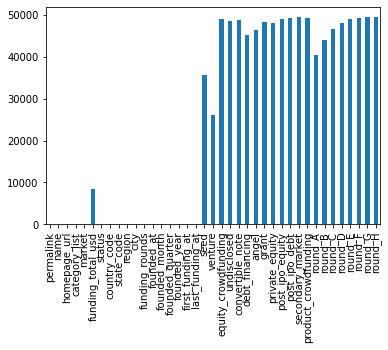

In [109]:

df.isin([0]).sum().plot(kind='bar')
